In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.shape

(10000, 14)

In [5]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [6]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [7]:
df.drop(columns = ['RowNumber','CustomerId','Surname'],inplace=True)

In [8]:
df.shape

(10000, 11)

In [9]:
df.Geography.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [10]:
df.HasCrCard.unique()

array([1, 0])

In [11]:
df['Gender'].value_counts()

,count
Gender,
Male,5457
Female,4543


In [12]:
df.isnull().sum()

,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0
HasCrCard,0
IsActiveMember,0
EstimatedSalary,0


In [13]:
df = pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

In [14]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


In [15]:
X = df.drop(columns=['Exited'])
y = df['Exited'].values

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [18]:
model = Sequential()

model.add(Dense(11,activation='sigmoid',input_dim=11))
model.add(Dense(11,activation='sigmoid'))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              12 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [20]:
model.compile(optimizer='Adam',loss='binary_crossentropy', metrics=['accuracy'])

In [21]:
history = model.fit(X_train_scaled,y_train,epochs=50,verbose=2,validation_split=0.2)

Epoch 1/50
200/200 - 2s - 8ms/step - accuracy: 0.7158 - loss: 0.5794 - val_accuracy: 0.7969 - val_loss: 0.4975
Epoch 2/50
200/200 - 0s - 2ms/step - accuracy: 0.7958 - loss: 0.4878 - val_accuracy: 0.7969 - val_loss: 0.4780
Epoch 3/50
200/200 - 0s - 1ms/step - accuracy: 0.7958 - loss: 0.4694 - val_accuracy: 0.7969 - val_loss: 0.4609
Epoch 4/50
200/200 - 0s - 2ms/step - accuracy: 0.7959 - loss: 0.4516 - val_accuracy: 0.7969 - val_loss: 0.4461
Epoch 5/50
200/200 - 1s - 3ms/step - accuracy: 0.8002 - loss: 0.4377 - val_accuracy: 0.8131 - val_loss: 0.4374
Epoch 6/50
200/200 - 1s - 4ms/step - accuracy: 0.8117 - loss: 0.4300 - val_accuracy: 0.8087 - val_loss: 0.4334
Epoch 7/50
200/200 - 1s - 3ms/step - accuracy: 0.8122 - loss: 0.4259 - val_accuracy: 0.8094 - val_loss: 0.4310
Epoch 8/50
200/200 - 1s - 3ms/step - accuracy: 0.8144 - loss: 0.4235 - val_accuracy: 0.8087 - val_loss: 0.4300
Epoch 9/50
200/200 - 1s - 3ms/step - accuracy: 0.8133 - loss: 0.4218 - val_accuracy: 0.8125 - val_loss: 0.4293
E

In [22]:
model.layers[0].get_weights()

[array([[ 0.15599354,  0.01573656, -0.06633513,  0.06122712,  0.17702858,
         -0.04510501,  0.08488062, -0.2594754 ,  0.09625049, -0.2020146 ,
          0.32598525],
        [-2.0857594 ,  0.4301366 ,  0.03954738, -0.95863855, -0.16652903,
         -1.6206155 , -0.18128276, -0.14440767, -1.8181788 ,  1.3743391 ,
         -1.8770314 ],
        [ 0.24704403,  0.09079909,  0.05098952, -0.12122834,  0.02961446,
          0.21631876,  0.3115147 ,  0.07096016,  0.30370548,  0.52002865,
         -0.3678196 ],
        [ 0.21380274, -0.6029383 , -0.19136359, -0.58101374, -0.0548743 ,
          0.08973742,  0.11496945,  0.33681586,  0.18297051, -0.14543413,
         -0.01475969],
        [-0.4269079 , -0.45181328, -0.66512376, -3.6102881 ,  0.96520835,
         -0.48941547,  0.829014  ,  0.7274456 , -0.61523885,  0.45620444,
         -0.50092155],
        [ 0.10870941,  0.07331567,  0.10931848, -0.02123967, -0.07487853,
         -0.04708718,  0.32832757, -0.2948592 ,  0.12061334,  0.4682542

In [23]:
ylog= model.predict(X_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [24]:
y_pred= np.where(ylog > 0.5,1,0)

In [25]:
y_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [26]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8645

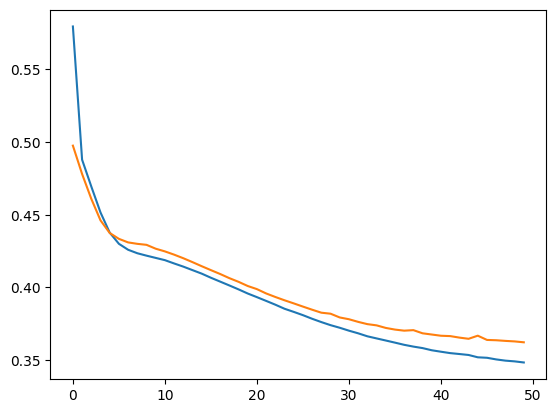

In [27]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

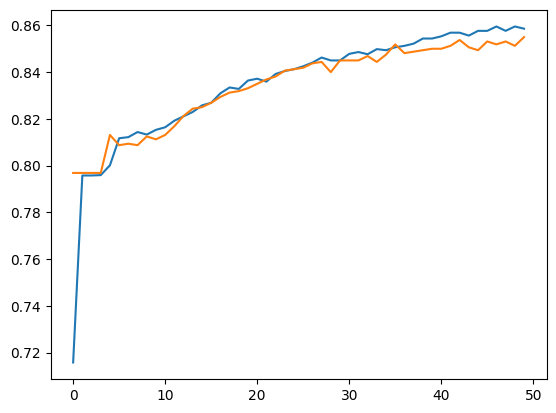

In [28]:

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])